In [14]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from torch_geometric.loader import DataLoader
import sevenn

from modules.nn import SimplePeriodicNetwork
from modules.dataset import build_dataset, AtomsToGraphCollater
from modules.property_prediction import SevenNetPropertiesPredictor
from modules.train import validate_epoch

radial_cutoff = 5

In [15]:
net_artem = SimplePeriodicNetwork(
    irreps_in="1x1o",  
    irreps_out="1x0e",  # Single scalar (L=0 and even parity) to output (for example) energy
    max_radius=radial_cutoff, # Cutoff radius for convolution
    num_neighbors=10.0,  # scaling factor based on the typical number of neighbors
    pool_nodes=True,  # We pool nodes to predict total energy
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

net_artem.load_state_dict(torch.load("../saved_models/simple_model_500epochs.torch", weights_only=True))
net_artem = net_artem.to(device)
net_artem.eval();

In [16]:
baseline_0 = SimplePeriodicNetwork(
    irreps_in="1x1o",  
    irreps_out="1x0e",  # Single scalar (L=0 and even parity) to output (for example) energy
    max_radius=radial_cutoff, # Cutoff radius for convolution
    num_neighbors=50.0,  # scaling factor based on the typical number of neighbors
    pool_nodes=True,  # We pool nodes to predict total energy
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

baseline_0.load_state_dict(torch.load("../saved_models/num_neighbors_50_forces_divided_by_mass_false_0_model_epoch_180.pt", weights_only=True))
baseline_0 = baseline_0.to(device)
baseline_0.eval();

print('successfully load')

successfully load


In [17]:
baseline_1 = SimplePeriodicNetwork(
    irreps_in="1x1o",  
    irreps_out="1x0e",  # Single scalar (L=0 and even parity) to output (for example) energy
    max_radius=radial_cutoff, # Cutoff radius for convolution
    num_neighbors=50.0,  # scaling factor based on the typical number of neighbors
    pool_nodes=True,  # We pool nodes to predict total energy
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

baseline_1.load_state_dict(torch.load("../saved_models/num_neighbors_50_forces_divided_by_mass_false_1_model_epoch_280.pt", weights_only=True))
baseline_1 = baseline_1.to(device)
baseline_1.eval();

print('successfully load')

successfully load


In [18]:
baseline_2 = SimplePeriodicNetwork(
    irreps_in="1x1o",  
    irreps_out="1x0e",  # Single scalar (L=0 and even parity) to output (for example) energy
    max_radius=radial_cutoff, # Cutoff radius for convolution
    num_neighbors=50.0,  # scaling factor based on the typical number of neighbors
    pool_nodes=True,  # We pool nodes to predict total energy
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

baseline_2.load_state_dict(torch.load("../saved_models/num_neighbors_50_forces_divided_by_mass_true_0_model_epoch_260.pt", weights_only=True))
baseline_2 = baseline_2.to(device)
baseline_2.eval();

print('successfully load')

successfully load


In [19]:
baseline_3 = SimplePeriodicNetwork(
    irreps_in="1x1o",  
    irreps_out="1x0e",  # Single scalar (L=0 and even parity) to output (for example) energy
    max_radius=radial_cutoff, # Cutoff radius for convolution
    num_neighbors=50.0,  # scaling factor based on the typical number of neighbors
    pool_nodes=True,  # We pool nodes to predict total energy
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

baseline_3.load_state_dict(torch.load("../saved_models/num_neighbors_50_forces_divided_by_mass_true_1_model_epoch_500.pt", weights_only=True))
baseline_3 = baseline_3.to(device)
baseline_3.eval();

print('successfully load')

successfully load


In [20]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from torch_geometric.loader import DataLoader
import sevenn

from modules.nn import SimplePeriodicNetwork
from modules.dataset import build_dataset, AtomsToGraphCollater
from modules.property_prediction import SevenNetPropertiesPredictor
from modules.train import validate_epoch

radial_cutoff = 5
batch_size = 10

dataset = build_dataset(csv_path = '../data/sevennet_slopes.csv')
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42)
# train_dataset = [dataset[i] for i in train_indices]
val_dataset = [dataset[i] for i in val_indices]

checkpoint_name = '7net-0'
sevennet_predictor = SevenNetPropertiesPredictor(checkpoint_name, device='cuda')
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
val_dataloader.collate_fn = AtomsToGraphCollater(
    cutoff=radial_cutoff, noise_std=0.01, properties_predictor=sevennet_predictor,
)

net_artem = SimplePeriodicNetwork(
    irreps_in="1x1o",  
    irreps_out="1x0e",  # Single scalar (L=0 and even parity) to output (for example) energy
    max_radius=radial_cutoff, # Cutoff radius for convolution
    num_neighbors=10.0,  # scaling factor based on the typical number of neighbors
    pool_nodes=True,  # We pool nodes to predict total energy
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

net_artem.load_state_dict(torch.load("../saved_models/simple_model_500epochs.torch", weights_only=True))
net_artem = net_artem.to(device)
net_artem.eval()


preds_artem_baseline = []
preds_0_baseline = []
preds_1_baseline = []
preds_2_baseline = []
preds_3_baseline = []

for _ in range(20):

    preds_artem = []
    preds_0 = []
    preds_1 = []
    preds_2 = []
    preds_3 = []

    for data in val_dataloader:
        data = data.to(device)
        with torch.no_grad():
            preds_artem.append(net_artem(data).squeeze().detach())
            preds_0.append(baseline_0(data).squeeze().detach())
            preds_1.append(baseline_1(data).squeeze().detach())
            preds_2.append(baseline_2(data).squeeze().detach())
            preds_3.append(baseline_3(data).squeeze().detach())
    preds_artem_baseline.append(preds_artem)
    preds_0_baseline.append(preds_0)
    preds_1_baseline.append(preds_1)
    preds_2_baseline.append(preds_2)
    preds_3_baseline.append(preds_3)

preds_tensor_artem = torch.stack([torch.concatenate(p) for p in preds_artem_baseline], dim=0).cpu()
preds_tensor_0 = torch.stack([torch.concatenate(p) for p in preds_0_baseline], dim=0).cpu()
preds_tensor_1 = torch.stack([torch.concatenate(p) for p in preds_1_baseline], dim=0).cpu()
preds_tensor_2 = torch.stack([torch.concatenate(p) for p in preds_2_baseline], dim=0).cpu()
preds_tensor_3 = torch.stack([torch.concatenate(p) for p in preds_3_baseline], dim=0).cpu()

y_true = torch.concatenate([i.target.cpu() for i in val_dataloader])




graph_build (1): 100%|██████████| 6/6 [00:00<00:00, 147.32it/s]


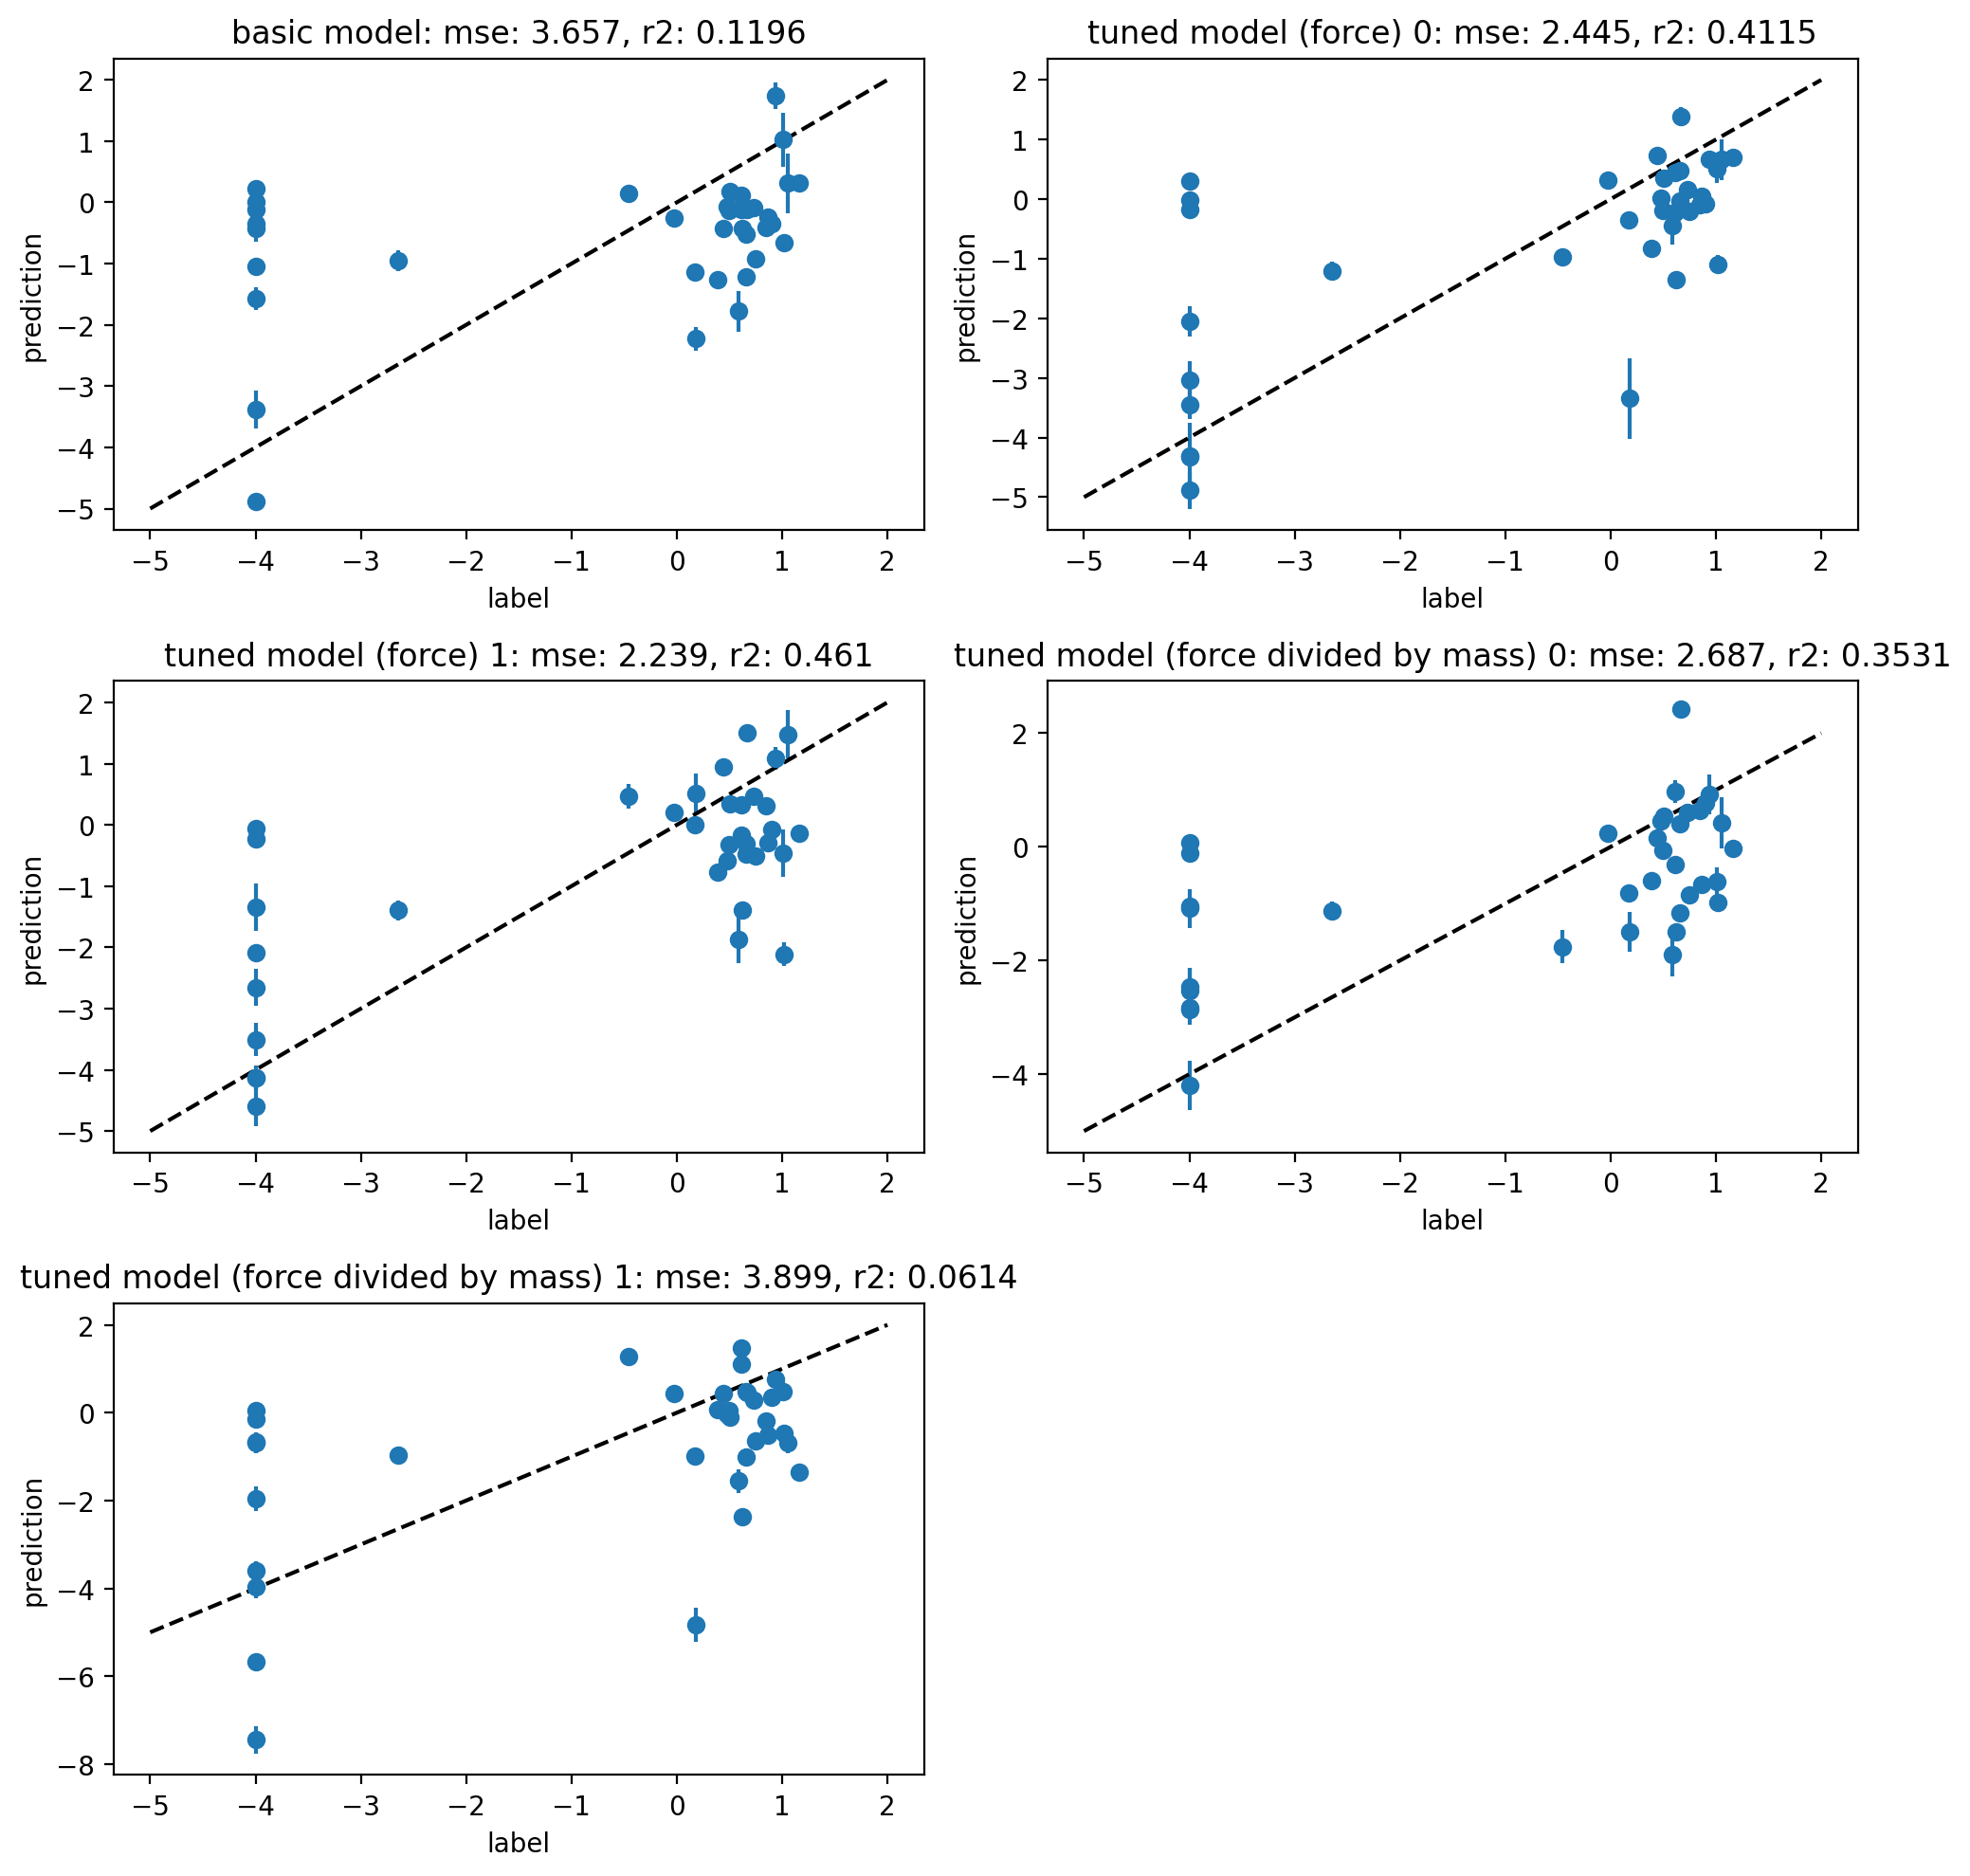

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Генерация случайных данных для демонстрации
np.random.seed(42)
n_points = 20
data_sets = [preds_tensor_artem, preds_tensor_0, preds_tensor_1, preds_tensor_2, preds_tensor_3]
name = ['basic model', 'tuned model (force) 0', 'tuned model (force) 1', 'tuned model (force divided by mass) 0', 'tuned model (force divided by mass) 1']
plt.figure(dpi=200, figsize=(10, 10))

for i, preds_tensor in enumerate(data_sets):
    plt.subplot(3, 2, i + 1)
    plt.errorbar(
        y_true,
        preds_tensor.mean(axis=0),
        yerr=preds_tensor.std(axis=0) / preds_tensor.shape[0]**0.5,
        fmt='o',
    )

    mean_y_true = y_true.mean()
    mean_preds = preds_tensor.mean(axis=0).mean()

    preds_mean = preds_tensor.mean(axis=0)
    
    mse = ((y_true - preds_mean)**2).mean()
    r2 = 1 - ((y_true - preds_mean)**2).sum() / ((y_true - y_true.mean())**2).sum()
    
    # plt.axhline(mean_y_true, color='blue', linestyle='--', label='Mean y_true')
    # plt.axhline(mean_preds, color='red', linestyle='--', label='Mean predictions')
    # plt.legend()
    plt.plot([-5, 2], [-5, 2], '--', color='k')
    plt.xlabel("label")
    plt.ylabel("prediction")
    plt.title(f"{name[i]}: mse: {round(mse.item(), 3)}, r2: {round(r2.item(), 4)}")

plt.tight_layout()
plt.show()



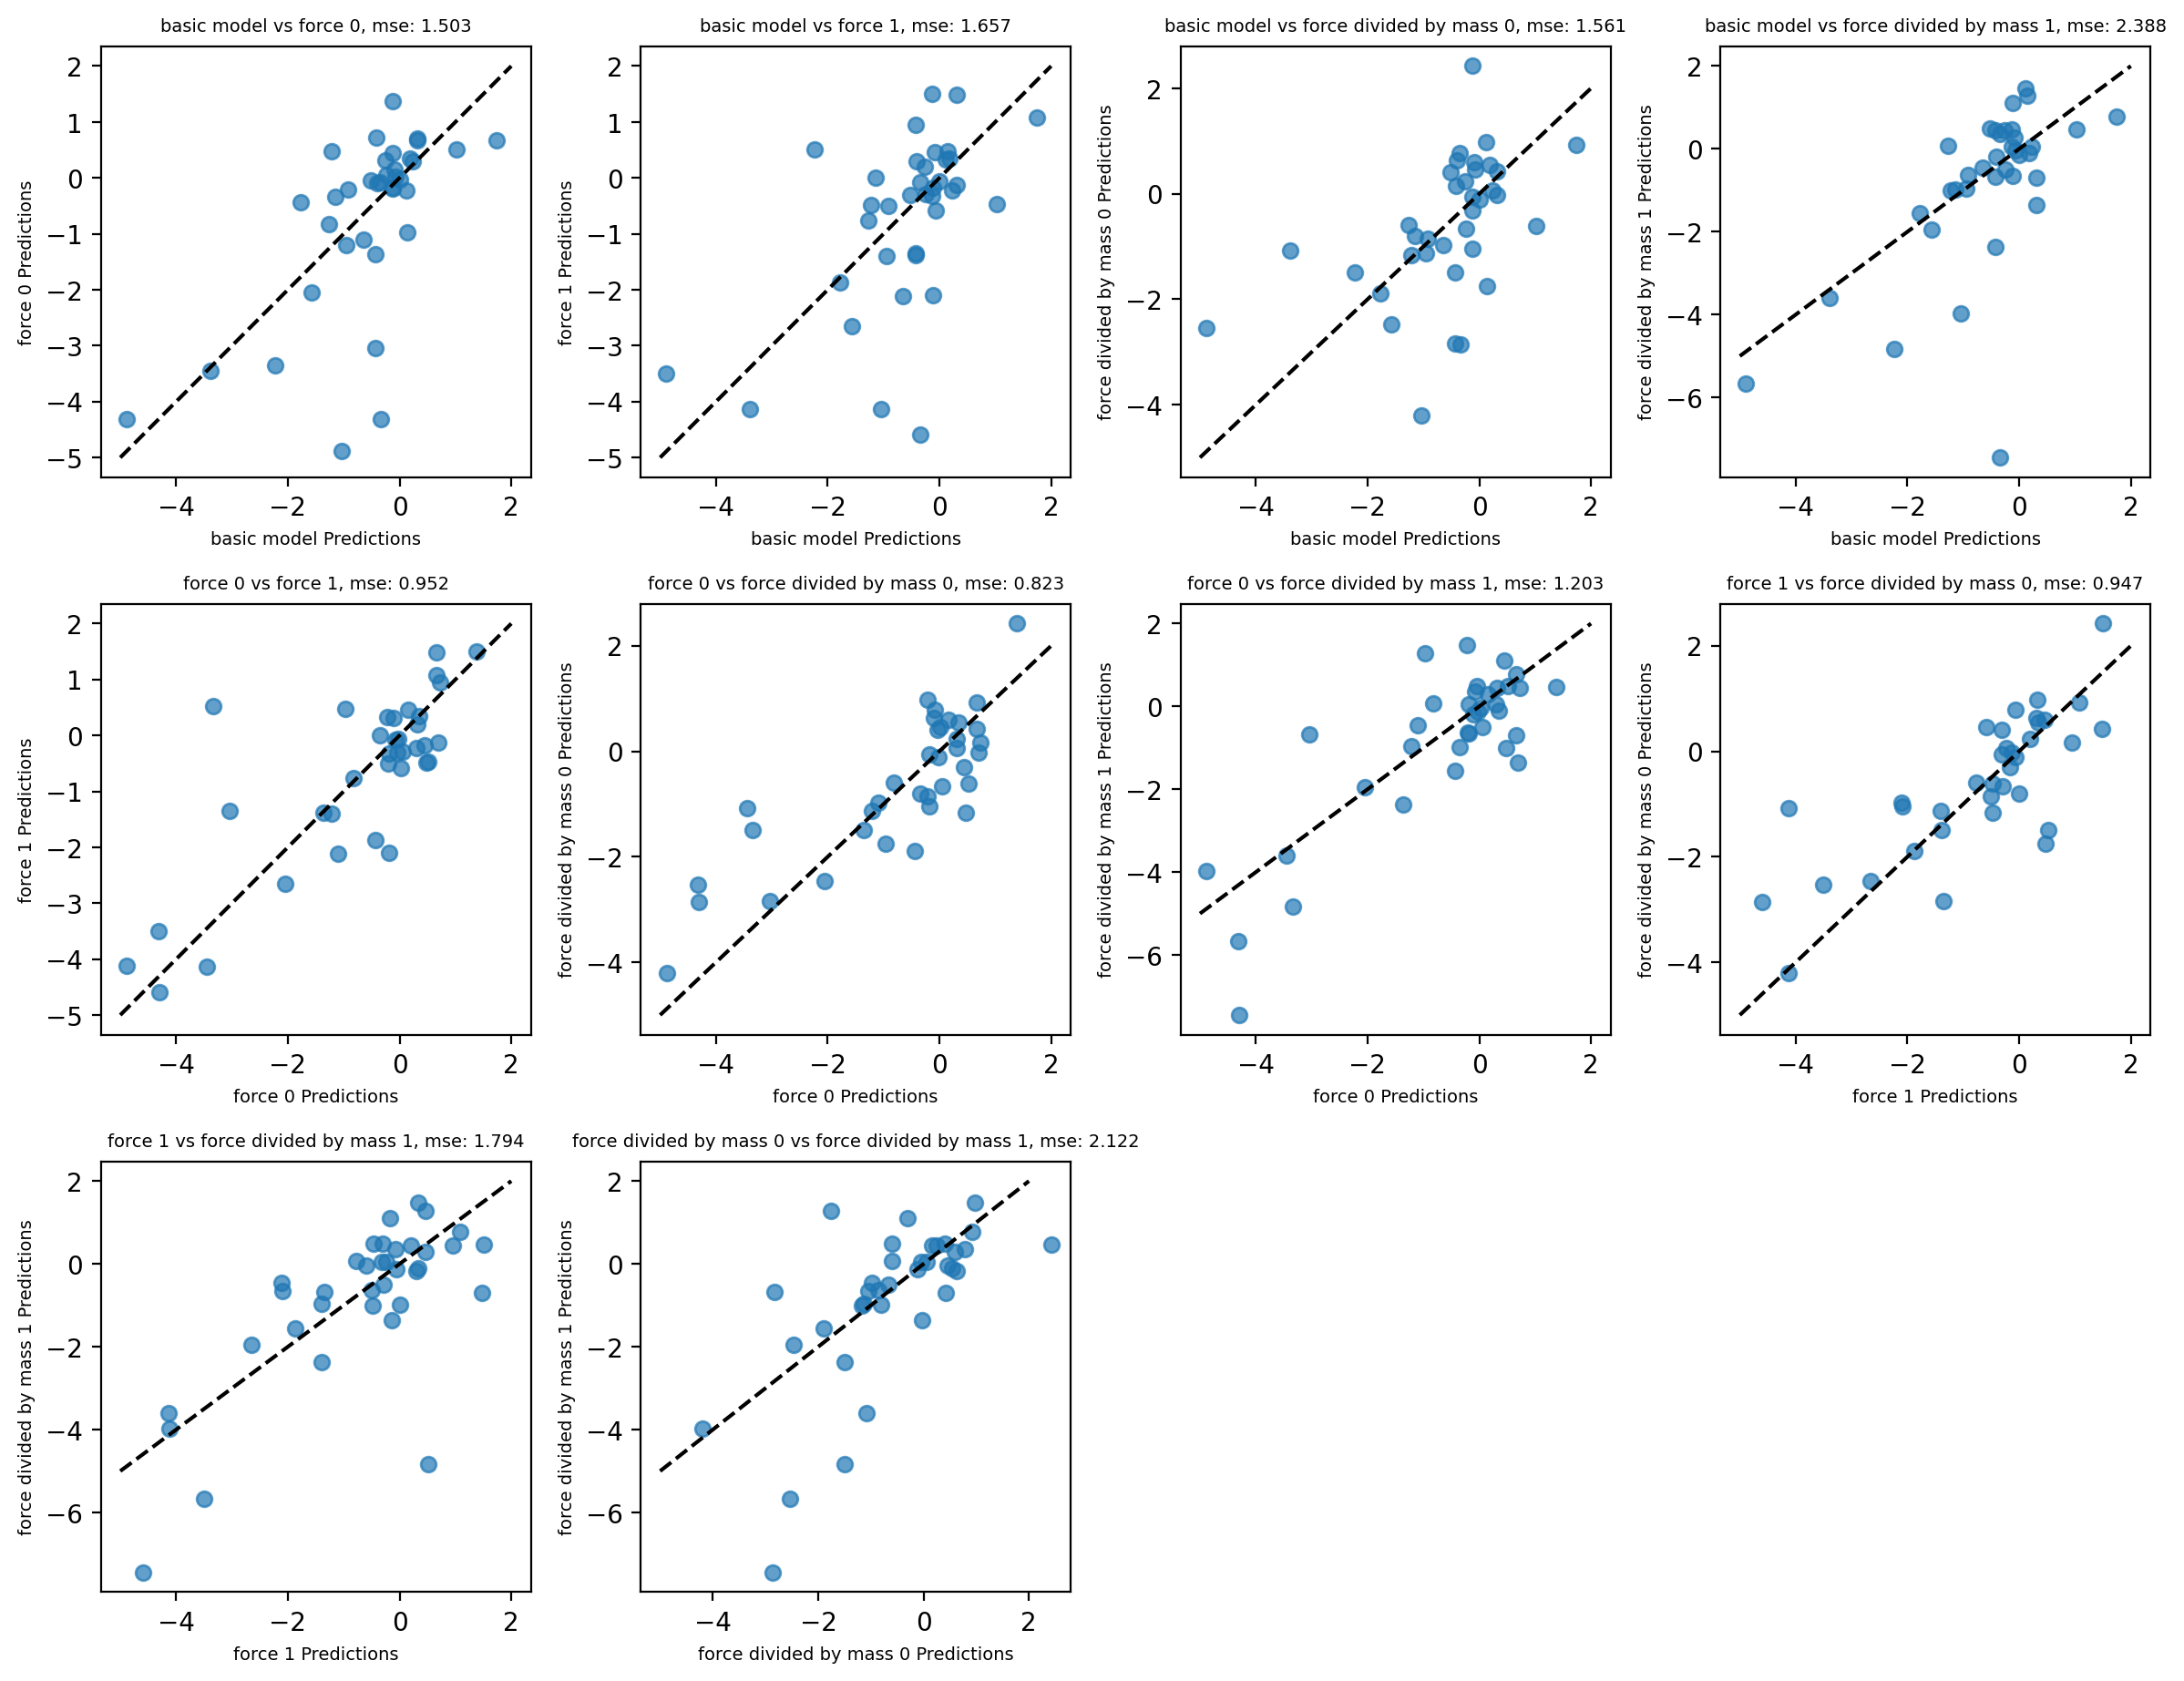

In [35]:
import matplotlib.pyplot as plt
import numpy as np

data_sets = [
    preds_tensor_artem,
    preds_tensor_0,
    preds_tensor_1,
    preds_tensor_2,
    preds_tensor_3
]

name = ['basic model', 'force 0', 'force 1', 'force divided by mass 0', 'force divided by mass 1']


# Визуализация результатов отдельных моделей
# plt.figure(dpi=200, figsize=(10, 10))

# for i, preds_tensor in enumerate(data_sets):
#     plt.subplot(3, 2, i + 1)
#     plt.errorbar(
#         y_true,
#         preds_tensor.mean(axis=0),
#         yerr=preds_tensor.std(axis=0) / preds_tensor.shape[0]**0.5,
#         fmt='o'
#     )
#     plt.plot([-5, 2], [-5, 2], '--', color='k')
#     plt.xlabel("True label")
#     plt.ylabel("Prediction")
#     plt.title(f"Dataset {labels[i]}")

# plt.tight_layout()
# plt.show()

# Попарное сравнение моделей
plt.figure(dpi=200, figsize=(12, 12))
n_datasets = len(data_sets)

pair_idx = 1
for i in range(n_datasets):
    for j in range(i + 1, n_datasets):
        plt.subplot(n_datasets - 1, n_datasets - 1, pair_idx)
        mean_i = data_sets[i].mean(axis=0)
        mean_j = data_sets[j].mean(axis=0)

        mse = ((mean_i - mean_j)**2).mean()
        plt.scatter(mean_i, mean_j, alpha=0.7)
        plt.plot([-5, 2], [-5, 2], '--', color='k')
        plt.xlabel(f"{name[i]} Predictions", fontsize = 7)
        plt.ylabel(f"{name[j]} Predictions", fontsize = 7)
        plt.title(f"{name[i]} vs {name[j]}, mse: {round(mse.item(), 3)}", fontsize = 7)
        pair_idx += 1

plt.tight_layout()
plt.show()
